# Machine Learning Experiment for Depression - classify depression or no depression

This notebook will produce the results for the machine learning experiment using time series data for my final year project "<i>Machine Learning-Based Human Activity Recognition for the Classification of Depression</i>". This project will use supervised machine learning and it is a classification problem where it will classify patients as <b>depression</b> or <b>non-depression</b>.<br>

Deliverable requirements for machine learning experiment:
- [x] Provide a time series graph to show the activity data over hourly intervals for each patient
- [x] Provide a time series graph to show the activity data over daily intervals for each patient
- [x] Perform data pre-processing on the <code>afftype</code> and <code>work</code> columns from the <code>scores.csv</code> file before creating the new dataset
- [x] Create the new dataset that is based on features extracted from each patient's actigraph data
- [x] Use machine learning to train the models for the new dataset with all features and with only relevant features using feature selection without using Leave One Subject Out Cross Validation
- [x] Use machine learning to train the models for the new dataset with all features and with only relevant features using feature selection with using Leave One Subject Out Cross Validation

The relevant libraries needed for the machine learning experiment are:
* NumPy
* Matplotlib
* Seaborn
* Pandas
* Sci-Kit Learn
* Time Series Feature Extraction Library (TSFEL)

NOTE: Make sure to install the TSFEL library using the command: <code>pip install tsfel</code>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tsfel
import os
import warnings

# Disable warning messages in the code
warnings.filterwarnings("ignore")

## Create the new dataset based on features extracted from each patient's actigraph data

For this deliverable, I will perform data pre-processing on the relevant features from the <code>scores.csv</code> file and then select relevant features that are useful before creating the new dataset. The new dataset will extract time series features from the patient's actigraph data in hourly intervals and add the relevant features from the <code>scores.csv</code> file.

### Data pre-processing on the scores.csv file

Before creating the new dataset, I will perform data pre-processing on the <code>scores.csv</code> file for the relevant features.

In [2]:
# Load the scores.csv file
scores_df = pd.read_csv("data/scores.csv")
scores_df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In the output above, there are missing values in majority of the columns.<br><br>
The columns that would be relevant for the new dataset are number and afftype columns. As seen above, the afftype column has missing values for the non-depressed patients.

To mitigate the risk of missing values for the afftype column, we can perform imputation which replaces missing values with a value.<br>

For the afftype column, we know that value 1 is <b>bipolar II</b>, 2 is <b>unipolar depressive</b> and 3 is <b>bipolar I</b> and we can notice these values are filled in for the depressed patients. However for non-depressed patients, we can impute the value 0 to indicate <b>no depression</b>.<br>

In [3]:
# Look the current count for the afftype column
scores_df["afftype"].value_counts()

2.0    15
1.0     7
3.0     1
Name: afftype, dtype: int64

We notice that only one depressed patient has bipolar I, 7 depressed patients have bipolar II and 15 depressed patients have unipolar. However there are missing values for non-depressed patients in the afftype column, we can impute the value 0 to indicate no depression.

In [4]:
'''
Notice the missing values for non-depressed patients in the afftype column
Impute the value 0 to all non-depressed patients to indicate 'no depression'
''' 
for i in range(23, 55):
    scores_df.at[i, 'afftype'] = 0

scores_df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [5]:
# Look the new count for the afftype column
scores_df["afftype"].value_counts()

0.0    32
2.0    15
1.0     7
3.0     1
Name: afftype, dtype: int64

### Create the new dataset
Now we can create the new dataset based on features extracted from each patient's actigraph data.<br>

For this, we need to create a CSV file of the new dataset and for each patient:
* Use the TSFEL library to extract new features over hourly intervals using temporal data
* Add a new feature to the dataset for patient ID/number so the data points generated have the same value for the appropriate patient ID/number and each hourly window is tied to the appropriate patient
* Add a new feature for the afftype so that the data points generated have the same value for the appropriate patient
* Add a new feature for depression - if the patient has no depression then the value is 0 and if the patient has bipolar I, bipolar II or unipolar depressive then the value is 1

First extract the features for all patients using the TSFEL library.

In [6]:
# Define condition and control folders
condition = "data/condition"
control = "data/control"

In [7]:
# Load a condition and control patient file to see the time series data
condition_1 = pd.read_csv("data/condition/condition_1.csv")
control_1 = pd.read_csv("data/control/control_1.csv")

In [8]:
condition_1

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166
...,...,...,...
23239,2003-05-23 15:19:00,2003-05-23,0
23240,2003-05-23 15:20:00,2003-05-23,0
23241,2003-05-23 15:21:00,2003-05-23,0
23242,2003-05-23 15:22:00,2003-05-23,0


In [9]:
control_1

,timestamp,date,activity
0,2003-03-18 15:00:00,2003-03-18,60
1,2003-03-18 15:01:00,2003-03-18,0
2,2003-03-18 15:02:00,2003-03-18,264
3,2003-03-18 15:03:00,2003-03-18,662
4,2003-03-18 15:04:00,2003-03-18,293
...,...,...,...
51606,2003-04-23 12:06:00,2003-04-23,3
51607,2003-04-23 12:07:00,2003-04-23,3
51608,2003-04-23 12:08:00,2003-04-23,3
51609,2003-04-23 12:09:00,2003-04-23,3


As seen above the timestamp is recorded in one minute intervals for measuring activity counts from an actigraph watch. We want the TSFEL library to extract new features over hourly intervals.<br>

We can set the sampling frequency as 1 Hz. Using 1 Hz we can multiply this by 60 minutes (1 hour) and we get 60 data points as the window size to extract features in hourly intervals. Temporal features will be used for feature extraction.

In [10]:
# Function to extract features for each patient file
def extract_time_series_features(patient_data):
    # Extract the patient number from the file name - e.g. condition_1.csv is split to condition_1
    patient_number = os.path.basename(patient_data).split('.')[0]
    
    # Load the DataFrame for the patient file
    patient_df = pd.read_csv(patient_data)
    
    # Extract temporal features using TSFEL
    cfg_file = tsfel.get_features_by_domain("temporal")
    
    features = tsfel.time_series_features_extractor(
        cfg_file,
        patient_df["activity"],
        fs=1, # Sampling frequency set at 1 Hz
        window_size=60, # Hourly intervals (1 hour=60 minutes) - 1 Hz x 60 minutes = 60 data points
        verbose=0
    )
    
    # Insert the patient number as the first column
    features.insert(0, 'number', patient_number)
    return features

In [11]:
# Function to extract features for all patients
def extract_all_patient_features(folder):
    # List to collect the extracted features for all patients
    all_patient_features = []
    
    # Loop through all the files and extract the features
    for f in os.listdir(folder):
        # Check if the file is a CSV file - if so extract the temporal features for all patients
        if f.endswith(".csv"):
            patient_file = os.path.join(folder, f)
            patient_features = extract_time_series_features(patient_file)
            all_patient_features.append(patient_features)
    
    # Concatenate all patients with their temporal features into a new DataFrame
    features_df = pd.concat(all_patient_features, ignore_index=True)
    return features_df

In [12]:
# Extract features for depressed patients
condition_features = extract_all_patient_features(condition)

In [13]:
condition_features

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083,12785.0,3.0
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624,8798.0,3.0
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465,11459.0,7.0
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111,9933.0,14.0
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,0.924229,8737.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9177,condition_9,9805.5,8258943.0,9.318980,107.338983,-28.118644,33.0,0.0,8.0,2.0,10.0,6353.503210,-9.620922,6333.0,9.0
9178,condition_9,1033.0,600727.0,16.827043,24.101695,0.000000,0.0,0.0,0.0,1.0,3.0,1474.652678,-0.739455,1422.0,6.0
9179,condition_9,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,0.000000,0.0,0.0
9180,condition_9,30199.0,34324479.0,42.625566,71.593220,0.000000,0.0,0.0,4.0,0.0,5.0,4255.134412,21.246207,4224.0,2.0


In [14]:
condition_features.shape

(9182, 15)

After performing feature extraction for depressed patients using temporal data, we can see 14 temporal features extracted from the patients' activity data.<br>

In this extracted data, there are 9182 rows and 15 columns (including the number (patient ID) column) for condition patients.

In [15]:
# Extract features for non-depressed patients
control_features = extract_all_patient_features(control)

In [16]:
control_features

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,control_1,9326.0,5076847.0,9.890104,142.983051,0.101695,62.0,-18.0,17.0,2.0,17.0,8437.707426,-5.953570e+00,8436.0,4.0
1,control_1,14771.0,16467673.0,46.411548,181.220339,26.440678,74.0,5.0,15.0,2.0,17.0,10695.200739,8.134454e+00,10692.0,10.0
2,control_1,65211.5,97004748.0,19.981332,383.271186,-24.661017,288.0,0.0,18.0,2.0,17.0,22615.279140,-2.083056e+01,22613.0,0.0
3,control_1,19661.5,12267300.0,33.452533,244.525424,4.898305,229.0,-8.0,20.0,2.0,19.0,14429.480910,1.998388e+00,14427.0,2.0
4,control_1,33380.0,41691638.0,12.263850,219.322034,-17.694915,155.0,0.0,14.0,1.0,14.0,12958.275567,-2.980650e+01,12940.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16979,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0
16980,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0
16981,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0
16982,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0


In [17]:
control_features.shape

(16984, 15)

After performing feature extraction for non-depressed patients using temporal data, we can see 14 temporal features extracted from the patients' activity data.<br>

In this extracted data, there are 16984 rows and 15 columns (including the number (patient ID) column) for control patients.

We can save these feature extracted data as a CSV file.

In [ ]:
# Save the condition features as a CSV file in the extracted_features_data folder within the new_data_final folder
condition_features.to_csv("new_data_final/extracted_features_data/condition_hourly_temporal_features.csv", index=False)

In [ ]:
# Save the control features as a CSV file in the extracted_features_data folder within the new_data_final folder
control_features.to_csv("new_data_final/extracted_features_data/control_hourly_temporal_features.csv", index=False)

Now the features are extracted for both depressed and non-depressed patients, we will merge the features extracted from condition and control patients with their patient number (identifier) and their temporal features into one new DataFrame.

Add a feature for afftype column from <code>scores.csv</code> so these are generated to the appropriate patient.

Add a feature for depression state and assign 0 to patients who do not have depression and 1 to patients who have bipolar I, bipolar II and unipolar depression.

In [18]:
# Check temporal features for depressed patients
condition_features

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083,12785.0,3.0
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624,8798.0,3.0
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465,11459.0,7.0
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111,9933.0,14.0
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,0.924229,8737.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9177,condition_9,9805.5,8258943.0,9.318980,107.338983,-28.118644,33.0,0.0,8.0,2.0,10.0,6353.503210,-9.620922,6333.0,9.0
9178,condition_9,1033.0,600727.0,16.827043,24.101695,0.000000,0.0,0.0,0.0,1.0,3.0,1474.652678,-0.739455,1422.0,6.0
9179,condition_9,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,0.000000,0.0,0.0
9180,condition_9,30199.0,34324479.0,42.625566,71.593220,0.000000,0.0,0.0,4.0,0.0,5.0,4255.134412,21.246207,4224.0,2.0


In [19]:
# Check temporal features for non-depressed patients
control_features

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,control_1,9326.0,5076847.0,9.890104,142.983051,0.101695,62.0,-18.0,17.0,2.0,17.0,8437.707426,-5.953570e+00,8436.0,4.0
1,control_1,14771.0,16467673.0,46.411548,181.220339,26.440678,74.0,5.0,15.0,2.0,17.0,10695.200739,8.134454e+00,10692.0,10.0
2,control_1,65211.5,97004748.0,19.981332,383.271186,-24.661017,288.0,0.0,18.0,2.0,17.0,22615.279140,-2.083056e+01,22613.0,0.0
3,control_1,19661.5,12267300.0,33.452533,244.525424,4.898305,229.0,-8.0,20.0,2.0,19.0,14429.480910,1.998388e+00,14427.0,2.0
4,control_1,33380.0,41691638.0,12.263850,219.322034,-17.694915,155.0,0.0,14.0,1.0,14.0,12958.275567,-2.980650e+01,12940.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16979,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0
16980,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0
16981,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0
16982,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0


In [20]:
# Concatenate the DataFrames of the temporal features for condition and control patients into a new DataFrame
new_patient_df = pd.concat([condition_features, control_features], ignore_index=True)
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0


In [21]:
# Load scores.csv with the imputed values for afftype column
scores_df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [22]:
# Merge the afftype column from scores.csv so they are generated to the appropriate patient
new_patient_df = pd.merge(new_patient_df, scores_df[['number', 'afftype']], on='number', how='left')
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,afftype
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,2.0
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,2.0
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,2.0
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,2.0
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0.0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0.0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0.0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0.0


In [23]:
# Add depression state feature - assign non-depressed patients to 0 and depressed patients to 1

# Initialise depression state column with 0
new_patient_df["depression_state"] = 0

# Initialise 1 to depressed patients if the value of the number column starts with "condition"
new_patient_df.loc[new_patient_df["number"].str.startswith('condition'), "depression_state"] = 1

new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,afftype,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,2.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,2.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,2.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,2.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0.0,0


In [24]:
# Check the count for depression_state column
new_patient_df["depression_state"].value_counts()

0    16984
1     9182
Name: depression_state, dtype: int64

We notice that the <code>depression_state</code> label shows the value 1 for condition patients who have either bipolar I, bipolar II and unipolar depression and the value 0 for control patients who do not have depression.

If you recall back to the feature extraction, the condition features DataFrame had 9182 rows which is now seen in the above output by the value <b>1</b> in the <code>depression_state</code> column and the control features DataFrame had 16984 rows which is now seen in the above output by the value <b>0</b> in the <code>depression_state</code> column.

Finally, we will save this new dataset as a CSV file and use it for training the machine learning models.

In [ ]:
# Save the new_patient_df DataFrame as a CSV file
new_patient_df.to_csv("new_data_final/depression_hourly_time_series_data_temporal.csv", index=False)

## Machine Learning with the new dataset

Now the new dataset is created and it has temporal features extracted using TSFEL and the afftype column from scores.csv using the values imputed for pre-processing, we can use the dataset to train the machine learning model.

For machine learning, we need to do some pre-processing:
* We need to do feature selection to select the relevant TSFEL's temporal features to use for classification. A correlation matrix will be used for this purpose.
* I will be classifying patients as depressed/non-depressed so the target label will be the <code>depression_state</code> column, so remove the <code>afftype</code> column for the depression/non-depression classification

### Feature Selection

Firstly, we will perform feature selection to select the relevant temporal features to use for classification when doing the experiments with the relevant features. To do this, an attribute correlation would be needed to select the most important features for predicting the target <code>depression_state</code>.

In [25]:
# Load the new_patient_df DataFrame
new_patient_df = pd.read_csv("new_data_final/depression_hourly_time_series_data_temporal.csv")
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,afftype,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,2.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,2.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,2.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,2.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0.0,0


Before creating the attribution correlation matrix, we need to remove the number and afftype column since we will be classifying depression or non-depression.

In [26]:
# Remove number and afftype column
new_patient_df.drop(columns=['number', 'afftype'], axis=1, inplace=True)
new_patient_df

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,depression_state
0,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,1
1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,1
2,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,1
3,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,1
4,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0
26162,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0
26163,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0
26164,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0


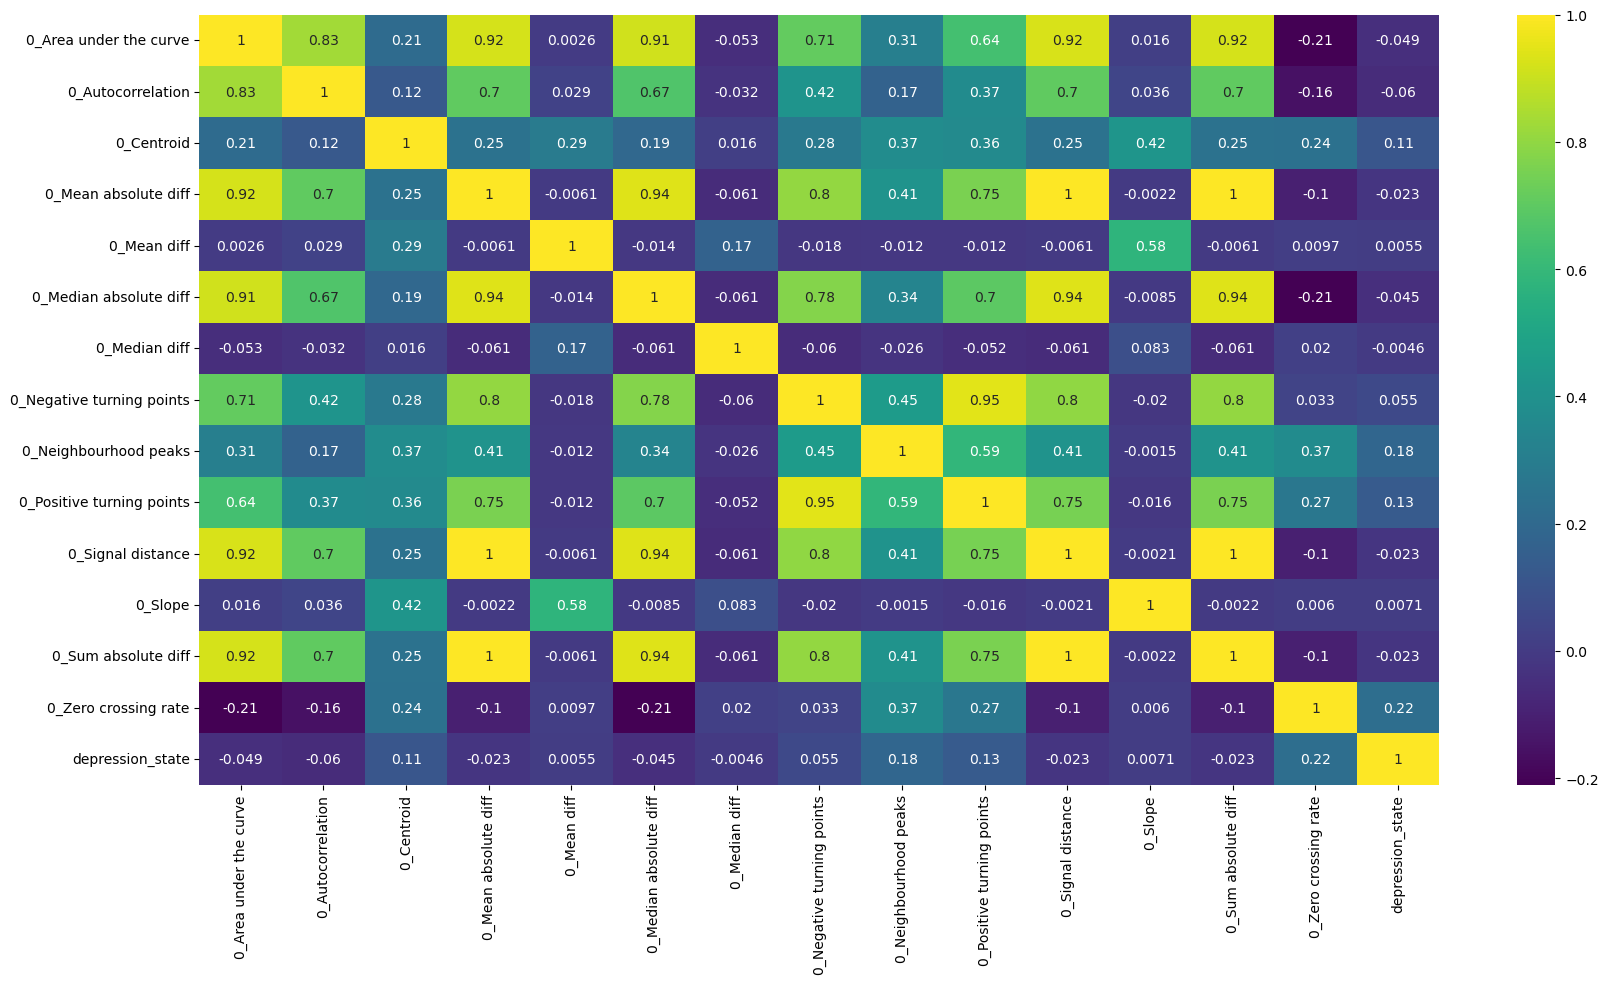

In [27]:
# Figure size
plt.figure(figsize=(20,10))

patient_corr = new_patient_df.corr()

# Plot the correlation matrix
corr_mat = sns.heatmap(patient_corr, annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

We can provide a strong correlation between the independent features and the target variable. For positive correlation we can select features that are above 0.05 and for negative correlation we can select features that below -0.05.

The correlation between the independent features and target variable that are above 0.05 are 0_Centroid, 0_Negative turning points, 0_Neighbourhood peaks, 0_Positive turning points and 0_Zero crossing rate.<br>

The correlation between the independent features and target variable that are below -0.05 is 0_Autocorrelation.<br>

Overall we have 6 relevant features needed for feature selection.

### Training the machine learning model

Before we train the machine learning model, we need to drop the number column as the model will learn to classify the patient ID.<br>

For training the model, we will try a few machine learning models without cross validation and then with cross validation using a technique called Leave One Subject Out Cross Validation. Leave One Subject Out Cross Validation will train the model on all but one patient’s data, test it against that patient, and it does the same for each patient.<br>

For the depression/non-depression classification, I will be training the models with all the features and then training the models with the relevant features using feature selection to compare the results.<br>

The evaluation metrics used for this experiment are accuracy, precision, recall, F1 score and balanced accuracy score.

In [28]:
# Load the new_patient_df DataFrame
new_patient_df = pd.read_csv("new_data_final/depression_hourly_time_series_data_temporal.csv")
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,afftype,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,2.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,2.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,2.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,2.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0.0,0


In [29]:
# Remove the afftype column
new_patient_df.drop('afftype', axis=1, inplace=True)
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0


Using this new dataset for classifying depression/non-depression, the independent variables <code>X</code> are the temporal features from TSFEL and the dependent variable <code>y</code> is the <code>depression_state</code> label.

#### Random Forest

The first machine learning model that will be used to train the dataset is Random Forest. We will train the Random Forest model with all the temporal features and then train the Random Forest model with the relevant features using feature selection. This will be done without cross validation first and then with cross validation.

**Train the Random Forest model with all the temporal features without Leave One Subject Out Cross Validation**

In [30]:
from sklearn.model_selection import train_test_split

'''
Train the Random Forest model with all the temporal features without cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [31]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
20694,28926.0,33918342.0,32.619145,231.288136,1.661017,100.0,0.0,11.0,1.0,11.0,13662.983554,1.662795,13646.0,6.0
19564,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,0.000000,0.0,0.0
7944,23806.5,19761575.0,26.105226,223.542373,-4.457627,150.0,0.0,13.0,1.0,13.0,13194.826229,-5.131064,13189.0,8.0
9838,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,0.000000,0.0,0.0
9380,28727.0,35739081.0,35.357631,298.542373,-17.186441,142.0,-5.0,17.0,2.0,16.0,17617.110379,5.438316,17614.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1059.0,175926.0,22.560355,35.186441,0.033898,0.0,0.0,3.0,2.0,11.0,2110.888214,-0.417171,2076.0,21.0
5390,93.0,5981.0,4.164187,3.152542,0.000000,0.0,0.0,0.0,1.0,3.0,239.409050,-0.125007,186.0,6.0
860,3777.5,1822887.0,21.055636,49.745763,-0.118644,0.0,0.0,7.0,1.0,6.0,2970.527679,-2.069436,2935.0,5.0
15795,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,0.000000,0.0,0.0


In [33]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
674,21678.0,19831322.0,31.283272,146.067797,2.135593,81.0,0.0,12.0,1.0,16.0,8632.417597,7.226452e+00,8618.0,8.0
23642,463.0,95740.0,44.006810,12.779661,1.050847,0.0,0.0,0.0,1.0,2.0,807.034292,4.588497e-01,754.0,5.0
8358,18203.5,10898146.0,21.023372,188.322034,11.406780,117.0,0.0,19.0,1.0,18.0,11112.595439,-6.304751e+00,11111.0,0.0
25708,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0
23976,177.0,540.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.011185e-17,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23744,22523.0,18288287.0,30.393311,232.338983,1.966102,66.0,0.0,13.0,2.0,13.0,13722.355388,8.225896e-01,13708.0,3.0
9655,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,0.000000e+00,0.0,0.0
24804,302.0,1577.0,29.426760,0.237288,0.000000,0.0,0.0,0.0,0.0,7.0,64.798990,-5.834954e-04,14.0,0.0
7724,471.5,135270.0,55.617506,15.847458,-0.423729,0.0,0.0,4.0,1.0,8.0,977.632624,5.542651e-01,935.0,15.0


In [34]:
# Check y_train
y_train

20694    0
19564    0
7944     1
9838     0
9380     0
        ..
21575    0
5390     1
860      1
15795    0
23654    0
Name: depression_state, Length: 20932, dtype: int64

In [35]:
# Check y_test
y_test

674      1
23642    0
8358     1
25708    0
23976    0
        ..
23744    0
9655     0
24804    0
7724     1
12431    0
Name: depression_state, Length: 5234, dtype: int64

Using 80% training data and 20% test data, we notice that out of 26166 rows, 20932 rows are the training data and 5234 rows are the test data.

In [36]:
# Train Random Forest with all the temporal features without cross validation
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Predict the class for the independent variables
y_pred = rf_clf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

In [39]:
# Evaluation metric results for Random Forest with all the temporal features without cross validation

# Accuracy score for Random Forest
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Random Forest
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Random Forest
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Random Forest
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Random Forest
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6914405808177302
Precision:  0.6003210272873194
Recall:  0.4010723860589812
F1 Score:  0.48087431693989074
Balanced Accuracy:  0.6266270211684042


When training the Random Forest model with all the temporal features, it produced an accuracy score of 0.6914405808177302 (69.14%)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
# Confusion matrix for the Random Forest model with all the temporal features
confusion_matrix(y_test, y_pred)

array([[2871,  498],
       [1117,  748]], dtype=int64)

In [42]:
# Function to plot the confusion matrix for experiments without Leave One Subject Out Cross Validation
def plot_confusion_matrix_without_cross_validation(conf_matrix, title):
    # Figure size and font size scaling
    plt.figure(figsize=(8,6), dpi=100)
    sns.set(font_scale=1.1)

    # Visualise the confusion matrix using heatmap
    cm = sns.heatmap(conf_matrix, annot=True, fmt='d')
    cm.set_xlabel("Predicted Label", fontsize=14)
    cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
    cm.set_ylabel("Actual Label", fontsize=14)
    cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
    cm.set_title(title, fontsize=14)

    plt.show()

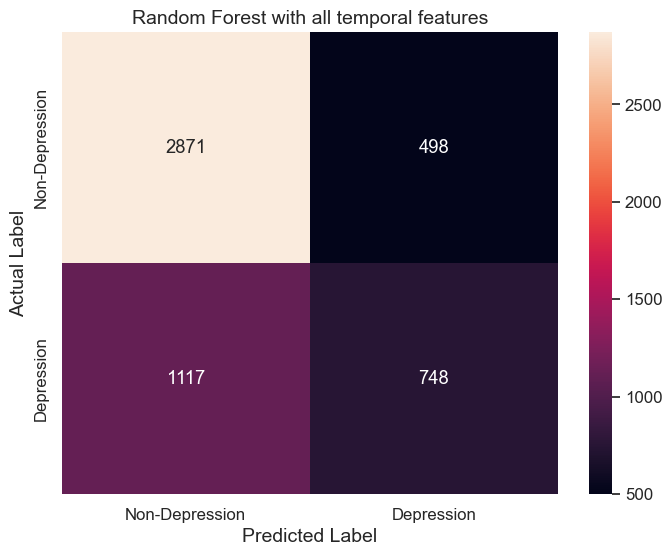

In [43]:
plot_confusion_matrix_without_cross_validation(confusion_matrix(y_test, y_pred),
                                               "Random Forest with all temporal features")

From the confusion matrix, True Positive (TP) is 2871, True Negative (TN) is 748, False Positive (FP) is 1117 and False Negative (FN) is 498.<br>

Out of the 5234 predictions, Random Forest has made 3619 correct predictions and 1615 incorrect predictions when including all the temporal features.

**Train the Random Forest model with all the temporal features with Leave One Subject Out Cross Validation**

In [44]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0


In [45]:
# Perform the Leave One Subject Out Cross Validation by importing Sci-kit Learn's LeaveOneGroupOut class
from sklearn.model_selection import LeaveOneGroupOut

In [46]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

In [47]:
# Function to create a confusion matrix for the mean results of experiments with Leave One Subject Out Cross Validation
def plot_confusion_matrix_cross_validation(conf_matrix, title):
    # Figure size and font size scaling
    plt.figure(figsize=(8,6), dpi=100)
    sns.set(font_scale=1.1)

    # Visualise the confusion matrix using heatmap to show the mean values
    cm = sns.heatmap(conf_matrix, annot=True, fmt='.2f')
    cm.set_xlabel("Predicted Label", fontsize=14)
    cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
    cm.set_ylabel("Actual Label", fontsize=14)
    cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
    cm.set_title(title, fontsize=14)

    plt.show()

In [48]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the Random Forest model with all the temporal features with cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest model using Leave One Subject Out Cross Validation
    rf_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = rf_clf.predict(X_test)
    
    # Accuracy score for Random Forest
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Random Forest
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Random Forest
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Random Forest
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Random Forest
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Random Forest
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Random Forest
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Random Forest
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Random Forest
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Random Forest
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Mean Accuracy:  0.6081348925806261
Mean Precision:  0.41818181818181815
Mean Recall:  0.13853297896702757
Mean F1 Score:  0.20185682737924163
Mean Balanced Accuracy:  0.6081348925806261


Using the Leave One Subject Out Cross Validation, the Random Forest model has a mean accuracy of 0.6081348925806261 (60.81%) when including all the temporal features

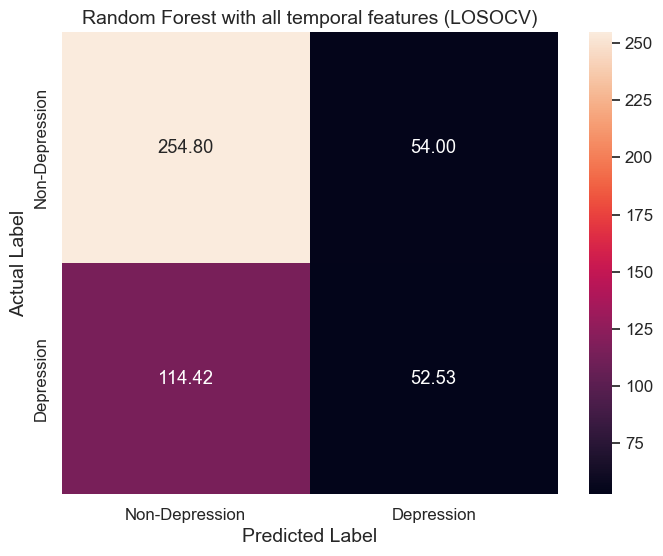

In [49]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of Random Forest with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "Random Forest with all temporal features (LOSOCV)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 254.80, True Negative (TN) is 52.53, False Positive (FP) is 114.52 and False Negative (FN) is 54.00.<br>

On an average of 475.75 predictions, Random Forest has made an average of 307.33 correct predictions and an average of 168.42 incorrect predictions when including all the temporal features.

**Train the Random Forest model with the relevant temporal features without Leave One Subject Out Cross Validation**

As mentioned in the feature selection phase, the relevant features needed for classification are 0_Centroid, 0_Negative turning points, 0_Neighbourhood peaks, 0_Positive turning points, 0_Zero crossing rate and 0_Autocorrelation. These are the 6 relevant features used for training the model.

In [50]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0


In [51]:
'''
Train the Random Forest model with the relevant features without cross validation

X - predictors - relevant features (drop number, depresssion_state and irrelevant temporal feature columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "0_Area under the curve",
                         "0_Mean absolute diff", "0_Mean diff", 
                         "0_Median absolute diff", "0_Median diff", 
                         "0_Signal distance", "0_Slope",
                         "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [52]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Check X_train
X_train

,0_Autocorrelation,0_Centroid,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Zero crossing rate
20694,33918342.0,32.619145,11.0,1.0,11.0,6.0
19564,0.0,0.000000,0.0,0.0,0.0,0.0
7944,19761575.0,26.105226,13.0,1.0,13.0,8.0
9838,0.0,0.000000,0.0,0.0,0.0,0.0
9380,35739081.0,35.357631,17.0,2.0,16.0,6.0
...,...,...,...,...,...,...
21575,175926.0,22.560355,3.0,2.0,11.0,21.0
5390,5981.0,4.164187,0.0,1.0,3.0,6.0
860,1822887.0,21.055636,7.0,1.0,6.0,5.0
15795,0.0,0.000000,0.0,0.0,0.0,0.0


In [54]:
# Check X_test
X_test

,0_Autocorrelation,0_Centroid,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Zero crossing rate
674,19831322.0,31.283272,12.0,1.0,16.0,8.0
23642,95740.0,44.006810,0.0,1.0,2.0,5.0
8358,10898146.0,21.023372,19.0,1.0,18.0,0.0
25708,2940.0,29.500000,0.0,0.0,0.0,0.0
23976,540.0,29.500000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
23744,18288287.0,30.393311,13.0,2.0,13.0,3.0
9655,0.0,0.000000,0.0,0.0,0.0,0.0
24804,1577.0,29.426760,0.0,0.0,7.0,0.0
7724,135270.0,55.617506,4.0,1.0,8.0,15.0


In [55]:
# Check y_train
y_train

20694    0
19564    0
7944     1
9838     0
9380     0
        ..
21575    0
5390     1
860      1
15795    0
23654    0
Name: depression_state, Length: 20932, dtype: int64

In [56]:
# Check X_train
y_test

674      1
23642    0
8358     1
25708    0
23976    0
        ..
23744    0
9655     0
24804    0
7724     1
12431    0
Name: depression_state, Length: 5234, dtype: int64

Using 80% training data and 20% test data, we notice that out of 26166 rows, 20932 rows are the training data and 5234 rows are the test data.

In [57]:
# Train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Predict the class for the independent variables
y_pred = rf_clf.predict(X_test)

In [59]:
# Evaluation metric results for Random Forest with the relevant features without cross validation

# Accuracy score for Random Forest
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Random Forest
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Random Forest
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Random Forest
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Random Forest
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6723347344287351
Precision:  0.557427258805513
Recall:  0.3903485254691689
F1 Score:  0.45916114790286977
Balanced Accuracy:  0.6093921315383838


When training the Random Forest model with the relevant features, it produced an accuracy score of 0.6723347344287351 (67.23%)

In [60]:
# Confusion matrix for the Random Forest model with the relevant features
confusion_matrix(y_test, y_pred)

array([[2791,  578],
       [1137,  728]], dtype=int64)

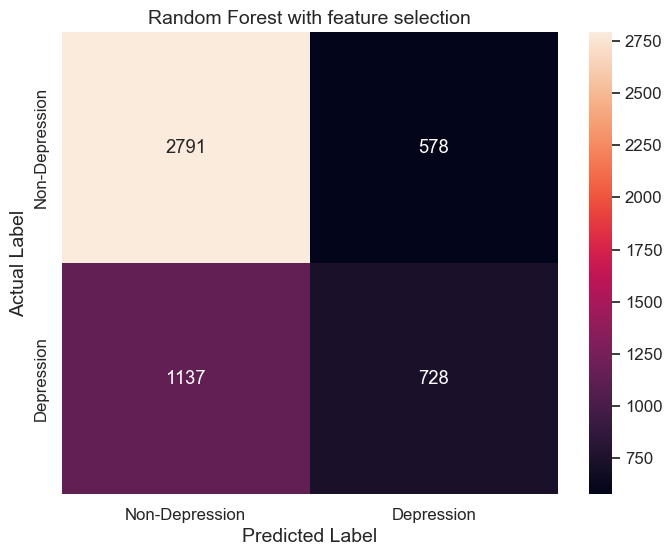

In [61]:
plot_confusion_matrix_without_cross_validation(confusion_matrix(y_test, y_pred),
                                               "Random Forest with feature selection")

From the confusion matrix, True Positive (TP) is 2791, True Negative (TN) is 728, False Positive (FP) is 1137 and False Negative (FN) is 578.

Out of the 5234 predictions, Random Forest has made 3519 correct predictions and 1715 incorrect predictions when including all the temporal features.

**Train the Random Forest model with the relevant temporal features with Leave One Subject Out Cross Validation**

In [62]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0


In [63]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

In [64]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the Random Forest model with the relevant features with cross validation

X - predictors - relevant features (drop number, depresssion_state and irrelevant temporal feature columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "0_Area under the curve",
                         "0_Mean absolute diff", "0_Mean diff", 
                         "0_Median absolute diff", "0_Median diff", 
                         "0_Signal distance", "0_Slope",
                         "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest model using Leave One Subject Out Cross Validation
    rf_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = rf_clf.predict(X_test)
    
    # Accuracy score for Random Forest
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Random Forest
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Random Forest
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Random Forest
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Random Forest
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Random Forest
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Random Forest
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Random Forest
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Random Forest
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Random Forest
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Mean Accuracy:  0.595048989455223
Mean Precision:  0.41818181818181815
Mean Recall:  0.1425131362749296
Mean F1 Score:  0.20779761676102027
Mean Balanced Accuracy:  0.595048989455223


Using the Leave One Subject Out Cross Validation, the Random Forest model has a mean accuracy of 0.595048989455223 (59.50%) when including the relevant features

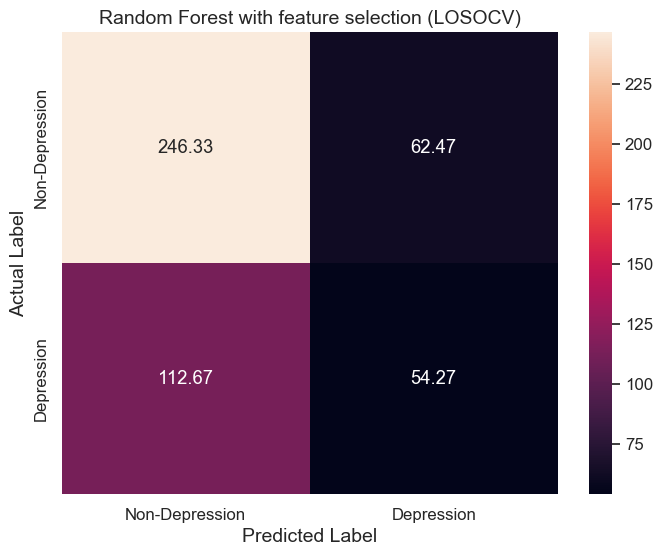

In [65]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of Random Forest with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "Random Forest with feature selection (LOSOCV)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 246.33, True Negative (TN) is 54.27, False Positive (FP) is 112.67 and False Negative (FN) is 62.47.

On an average of 475.74 predictions, Random Forest has made an average of 300.6 correct predictions and an average of 175.14 incorrect predictions when including the relevant features.

#### K-Nearest Neighbours

The second machine learning model that will be used to train the dataset is K-Nearest Neighbours. We will train the K-Nearest Neighbours model with all the temporal features and then train the K-Nearest Neighbours model with the relevant features using feature selection. This will be done without cross validation first and then with cross validation.

**Train the Random Forest model with all the temporal features without Leave One Subject Out Cross Validation**

In [66]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0


In [67]:
'''
Train the K-Nearest Neighbours model with all the temporal features without cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [68]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
20694,28926.0,33918342.0,32.619145,231.288136,1.661017,100.0,0.0,11.0,1.0,11.0,13662.983554,1.662795,13646.0,6.0
19564,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,0.000000,0.0,0.0
7944,23806.5,19761575.0,26.105226,223.542373,-4.457627,150.0,0.0,13.0,1.0,13.0,13194.826229,-5.131064,13189.0,8.0
9838,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,0.000000,0.0,0.0
9380,28727.0,35739081.0,35.357631,298.542373,-17.186441,142.0,-5.0,17.0,2.0,16.0,17617.110379,5.438316,17614.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1059.0,175926.0,22.560355,35.186441,0.033898,0.0,0.0,3.0,2.0,11.0,2110.888214,-0.417171,2076.0,21.0
5390,93.0,5981.0,4.164187,3.152542,0.000000,0.0,0.0,0.0,1.0,3.0,239.409050,-0.125007,186.0,6.0
860,3777.5,1822887.0,21.055636,49.745763,-0.118644,0.0,0.0,7.0,1.0,6.0,2970.527679,-2.069436,2935.0,5.0
15795,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,0.000000,0.0,0.0


In [70]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
674,21678.0,19831322.0,31.283272,146.067797,2.135593,81.0,0.0,12.0,1.0,16.0,8632.417597,7.226452e+00,8618.0,8.0
23642,463.0,95740.0,44.006810,12.779661,1.050847,0.0,0.0,0.0,1.0,2.0,807.034292,4.588497e-01,754.0,5.0
8358,18203.5,10898146.0,21.023372,188.322034,11.406780,117.0,0.0,19.0,1.0,18.0,11112.595439,-6.304751e+00,11111.0,0.0
25708,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0
23976,177.0,540.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.011185e-17,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23744,22523.0,18288287.0,30.393311,232.338983,1.966102,66.0,0.0,13.0,2.0,13.0,13722.355388,8.225896e-01,13708.0,3.0
9655,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,0.000000e+00,0.0,0.0
24804,302.0,1577.0,29.426760,0.237288,0.000000,0.0,0.0,0.0,0.0,7.0,64.798990,-5.834954e-04,14.0,0.0
7724,471.5,135270.0,55.617506,15.847458,-0.423729,0.0,0.0,4.0,1.0,8.0,977.632624,5.542651e-01,935.0,15.0


In [71]:
# Check y_train
y_train

20694    0
19564    0
7944     1
9838     0
9380     0
        ..
21575    0
5390     1
860      1
15795    0
23654    0
Name: depression_state, Length: 20932, dtype: int64

In [72]:
# Check y_test
y_test

674      1
23642    0
8358     1
25708    0
23976    0
        ..
23744    0
9655     0
24804    0
7724     1
12431    0
Name: depression_state, Length: 5234, dtype: int64

Using 80% training data and 20% test data, we notice that out of 26166 rows, 20932 rows are the training data and 5234 rows are the test data.

In [73]:
# Train K-Nearest Neighbours with all the temporal features without cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Feature Scaling using Standard Scaler before fitting the KNN model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the K-Nearest Neighbours model - use 5 nearest neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [74]:
# Predict the class for the independent variables
y_pred = knn_clf.predict(X_test_scaled)

In [75]:
# Evaluation metric results for K-Nearest Neighbours with all the temporal features without cross validation

# Accuracy score for K-Nearest Neighbours
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for K-Nearest Neighbours
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for K-Nearest Neighbours
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for K-Nearest Neighbours
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for K-Nearest Neighbours
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6476881925869316
Precision:  0.5073580939032937
Recall:  0.38820375335120644
F1 Score:  0.4398541919805589
Balanced Accuracy:  0.5897682465182865


When training the K-Nearest Neighbours model with all the temporal features, it produced an accuracy score of 0.6476881925869316 (64.76%)

In [76]:
# Confusion matrix for the K-Nearest Neighbours model with all the temporal features
confusion_matrix(y_test, y_pred)

array([[2666,  703],
       [1141,  724]], dtype=int64)

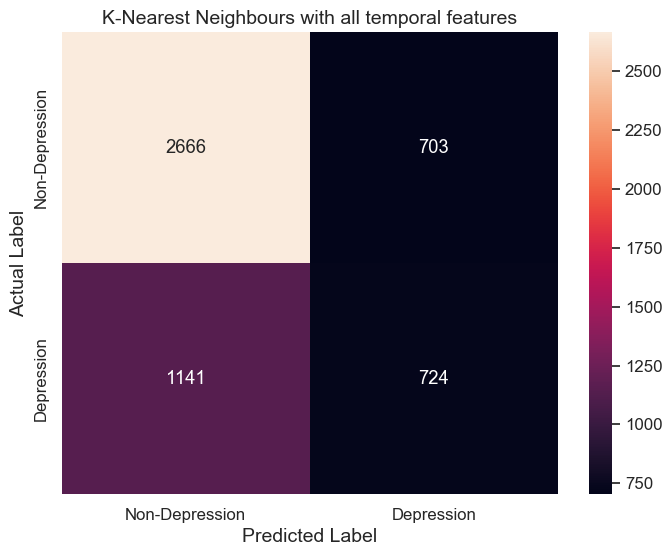

In [77]:
plot_confusion_matrix_without_cross_validation(confusion_matrix(y_test, y_pred),
                                               "K-Nearest Neighbours with all temporal features")

From the confusion matrix, True Positive (TP) is 2666, True Negative (TN) is 724, False Positive (FP) is 1141 and False Negative (FN) is 703.<br>

Out of the 5234 predictions, Random Forest has made 3390 correct predictions and 1844 incorrect predictions when including all the temporal features.

**Train the K-Nearest Neighbours model with all the temporal features with Leave One Subject Out Cross Validation**

In [78]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0


In [79]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define K-Nearest Neighbours Classifier with 5 nearest neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [80]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the K-Nearest Neighbours model with all the temporal features with cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Feature Scaling using Standard Scaler before fitting the KNN model
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    # Train the K-Nearest Neighbours model using Leave One Subject Out Cross Validation
    knn_clf.fit(X_train_scaled, y_train)
    
    # Predict the class for the independent variables
    y_pred = knn_clf.predict(X_test_scaled)
    
    # Accuracy score for K-Nearest Neighbours
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score K-Nearest Neighbours
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for K-Nearest Neighbours
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for K-Nearest Neighbours
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for K-Nearest Neighbours
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for K-Nearest Neighbours
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for K-Nearest Neighbours
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for K-Nearest Neighbours
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for K-Nearest Neighbours
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for K-Nearest Neighbours
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Mean Accuracy:  0.5436700275293235
Mean Precision:  0.41818181818181815
Mean Recall:  0.1481959848038217
Mean F1 Score:  0.21754541989269718
Mean Balanced Accuracy:  0.5436700275293235


Using the Leave One Subject Out Cross Validation, the K-Nearest Neighbours model has a mean accuracy of 0.5436700275293235 (54.36%) when including all the temporal features

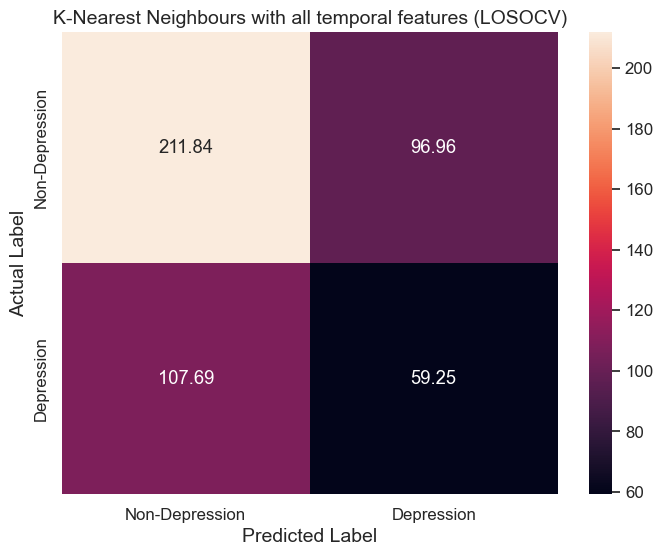

In [81]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of Random Forest with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "K-Nearest Neighbours with all temporal features (LOSOCV)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 211.84, True Negative (TN) is 59.25, False Positive (FP) is 107.69 and False Negative (FN) is 96.96.<br>

On an average of 475.74 predictions, K-Nearest Neighbours has made an average of 271.09 correct predictions and an average of 204.65 incorrect predictions when including all the temporal features.

**Train the K-Nearest Neighbours model with the relevant temporal features without Leave One Subject Out Cross Validation**

In [82]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0


In [83]:
'''
Train the K-Nearest Neighbours model with the relevant features without cross validation

X - predictors - relevant features (drop number, depresssion_state and irrelevant temporal feature columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "0_Area under the curve",
                         "0_Mean absolute diff", "0_Mean diff", 
                         "0_Median absolute diff", "0_Median diff", 
                         "0_Signal distance", "0_Slope",
                         "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [84]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Check X_train
X_train

,0_Autocorrelation,0_Centroid,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Zero crossing rate
20694,33918342.0,32.619145,11.0,1.0,11.0,6.0
19564,0.0,0.000000,0.0,0.0,0.0,0.0
7944,19761575.0,26.105226,13.0,1.0,13.0,8.0
9838,0.0,0.000000,0.0,0.0,0.0,0.0
9380,35739081.0,35.357631,17.0,2.0,16.0,6.0
...,...,...,...,...,...,...
21575,175926.0,22.560355,3.0,2.0,11.0,21.0
5390,5981.0,4.164187,0.0,1.0,3.0,6.0
860,1822887.0,21.055636,7.0,1.0,6.0,5.0
15795,0.0,0.000000,0.0,0.0,0.0,0.0


In [86]:
# Check X_test
X_test

,0_Autocorrelation,0_Centroid,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Zero crossing rate
674,19831322.0,31.283272,12.0,1.0,16.0,8.0
23642,95740.0,44.006810,0.0,1.0,2.0,5.0
8358,10898146.0,21.023372,19.0,1.0,18.0,0.0
25708,2940.0,29.500000,0.0,0.0,0.0,0.0
23976,540.0,29.500000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
23744,18288287.0,30.393311,13.0,2.0,13.0,3.0
9655,0.0,0.000000,0.0,0.0,0.0,0.0
24804,1577.0,29.426760,0.0,0.0,7.0,0.0
7724,135270.0,55.617506,4.0,1.0,8.0,15.0


In [87]:
# Check y_train
y_train

20694    0
19564    0
7944     1
9838     0
9380     0
        ..
21575    0
5390     1
860      1
15795    0
23654    0
Name: depression_state, Length: 20932, dtype: int64

In [88]:
# Check X_train
y_test

674      1
23642    0
8358     1
25708    0
23976    0
        ..
23744    0
9655     0
24804    0
7724     1
12431    0
Name: depression_state, Length: 5234, dtype: int64

Using 80% training data and 20% test data, we notice that out of 26166 rows, 20932 rows are the training data and 5234 rows are the test data.

In [89]:
# Feature Scaling using Standard Scaler before fitting the KNN model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the K-Nearest Neighbours model - use 5 nearest neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [90]:
# Predict the class for the independent variables
y_pred = knn_clf.predict(X_test_scaled)

In [91]:
# Evaluation metric results for K-Nearest Neighbours with the relevant features without cross validation

# Accuracy score for K-Nearest Neighbours
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for K-Nearest Neighbours
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for K-Nearest Neighbours
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for K-Nearest Neighbours
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for K-Nearest Neighbours
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6478792510508216
Precision:  0.5078459343794579
Recall:  0.381769436997319
F1 Score:  0.435873890419345
Balanced Accuracy:  0.5884804442332989


When training the K-Nearest Neighbours model with the relevant features, it produced an accuracy score of 0.6478792510508216 (64.78%)

In [92]:
# Confusion matrix for the K-Nearest Neighbours model with the relevant features
confusion_matrix(y_test, y_pred)

array([[2679,  690],
       [1153,  712]], dtype=int64)

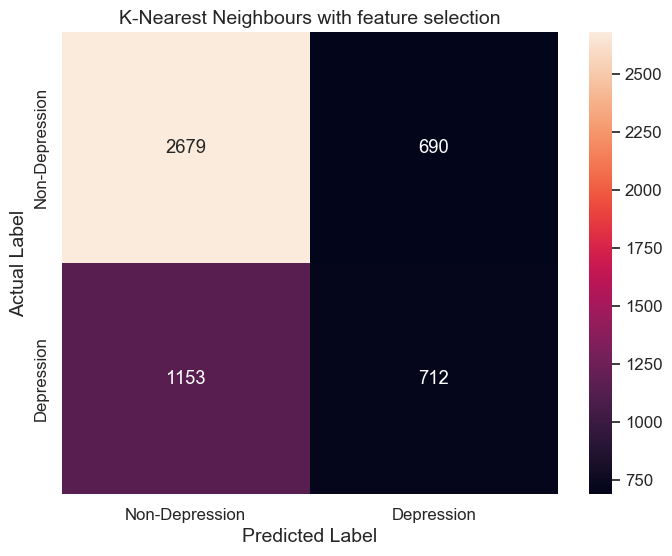

In [93]:
plot_confusion_matrix_without_cross_validation(confusion_matrix(y_test, y_pred),
                                               "K-Nearest Neighbours with feature selection")

From the confusion matrix, True Positive (TP) is 2679, True Negative (TN) is 712, False Positive (FP) is 1153 and False Negative (FN) is 690.<br>

Out of the 5234 predictions, Random Forest has made 3391 correct predictions and 1843 incorrect predictions when including the relevant features.

**Train the K-Nearest Neighbours model with the relevant temporal features with Leave One Subject Out Cross Validation**

In [94]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,depression_state
0,condition_1,20694.5,11191987.0,31.821197,216.694915,3.338983,150.0,0.0,16.0,2.0,14.0,12788.374959,2.999083e+00,12785.0,3.0,1
1,condition_1,16921.0,8078860.0,39.889938,149.118644,-5.186441,106.0,0.0,15.0,2.0,15.0,8803.539272,5.044624e+00,8798.0,3.0,1
2,condition_1,16733.5,9051577.0,34.039841,194.220339,0.593220,119.0,-6.0,14.0,2.0,16.0,11461.499311,3.374465e+00,11459.0,7.0,1
3,condition_1,13077.5,8124159.0,21.132863,168.355932,0.389831,90.0,12.0,17.0,2.0,18.0,9935.297455,-3.898111e+00,9933.0,14.0,1
4,condition_1,14299.5,7685663.0,35.597247,148.084746,-0.050847,79.0,-9.0,13.0,2.0,13.0,8740.510339,9.242290e-01,8737.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,control_9,413.0,2940.0,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,59.000000,-2.681580e-17,0.0,0.0,0
26162,control_9,3558.5,2318139.0,56.806817,44.661017,4.254237,0.0,0.0,1.0,0.0,2.0,2688.020020,4.913170e+00,2635.0,0.0,0
26163,control_9,7862.5,4409459.0,17.142844,118.864407,-5.949153,17.0,0.0,12.0,2.0,14.0,7032.569413,-5.571298e+00,7013.0,0.0,0
26164,control_9,3167.0,867152.0,28.485564,70.915254,-0.067797,0.0,0.0,5.0,2.0,10.0,4215.194223,-3.219228e-01,4184.0,0.0,0


In [95]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define K-Nearest Neighbours Classifier with 5 nearest neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [96]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the K-Nearest Neighbours model with the relevant features with cross validation

X - predictors - relevant features (drop number, depresssion_state and irrelevant temporal feature columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "0_Area under the curve",
                         "0_Mean absolute diff", "0_Mean diff", 
                         "0_Median absolute diff", "0_Median diff", 
                         "0_Signal distance", "0_Slope",
                         "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Feature Scaling using Standard Scaler before fitting the KNN model
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    # Train the K-Nearest Neighbours model using Leave One Subject Out Cross Validation
    knn_clf.fit(X_train_scaled, y_train)
    
    # Predict the class for the independent variables
    y_pred = knn_clf.predict(X_test_scaled)
    
    # Accuracy score for K-Nearest Neighbours
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score K-Nearest Neighbours
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for K-Nearest Neighbours
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for K-Nearest Neighbours
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for K-Nearest Neighbours
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for K-Nearest Neighbours
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for K-Nearest Neighbours
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for K-Nearest Neighbours
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for K-Nearest Neighbours
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for K-Nearest Neighbours
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Mean Accuracy:  0.546877293147679
Mean Precision:  0.41818181818181815
Mean Recall:  0.1496129882478359
Mean F1 Score:  0.2189751709243644
Mean Balanced Accuracy:  0.546877293147679


Using the Leave One Subject Out Cross Validation, the K-Nearest Neighbours model has a mean accuracy of 0.546877293147679 (54.68%) when including the relevant features

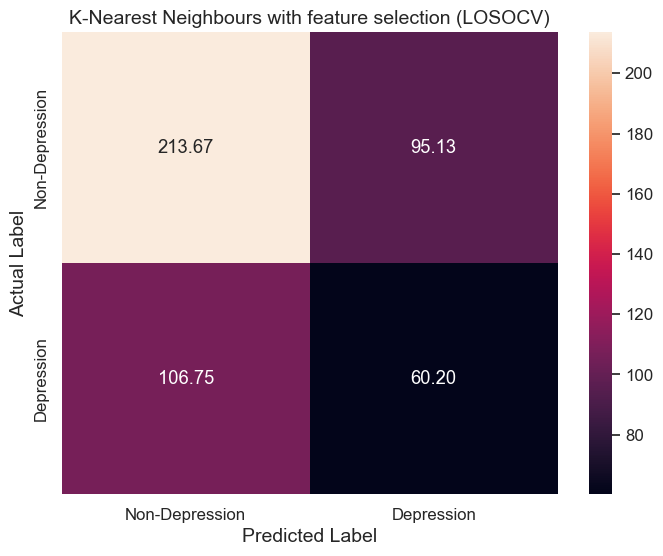

In [97]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of Random Forest with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "K-Nearest Neighbours with feature selection (LOSOCV)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 211.84, True Negative (TN) is 59.25, False Positive (FP) is 107.69 and False Negative (FN) is 96.96.<br>

On an average of 475.75 predictions, K-Nearest Neighbours has made an average of 273.87 correct predictions and an average of 201.88 incorrect predictions when including the relevant features.